# Split Training Model For The Hybrid Autoencoder

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses
from sklearn.metrics import accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt
import numpy as np

In [2]:
latent_dim = 2

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Dense(3, activation ="elu"),
      layers.Dense(5, activation="elu"),
      layers.Dense(5, activation="elu"),
      layers.Dense(4, activation="elu"),
      layers.Dense(3, activation="elu"),
      layers.Dense(latent_dim, activation="elu"),
    ])
    self.decoder = tf.keras.Sequential([
        layers.Dense(3, activation="elu"),
        layers.Dense(4, activation="elu"),
        layers.Dense(5, activation="elu"),
        layers.Dense(5, activation="elu"),
        layers.Dense(3, activation="elu")
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [3]:
autoencoder = Autoencoder(latent_dim)

In [4]:
def GenerateTargetState():
    return np.array([[0+0j, 1+0j, 0+0j]])
test_state = GenerateTargetState()
print(test_state)

[[0.+0.j 1.+0.j 0.+0.j]]


In [5]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [6]:
x_train = GenerateTargetState()

history = autoencoder.fit(x_train, x_train,
                epochs=300,
                validation_data=(x_train, x_train))

Epoch 1/300
1/1 [==============================] - 1s 505ms/step - loss: 0.5133 - val_loss: 0.4993
Epoch 2/300
1/1 [==============================] - 0s 16ms/step - loss: 0.4993 - val_loss: 0.4856
Epoch 3/300
1/1 [==============================] - 0s 17ms/step - loss: 0.4856 - val_loss: 0.4720
Epoch 4/300
1/1 [==============================] - 0s 16ms/step - loss: 0.4720 - val_loss: 0.4586
Epoch 5/300
1/1 [==============================] - 0s 16ms/step - loss: 0.4586 - val_loss: 0.4453
Epoch 6/300
1/1 [==============================] - 0s 16ms/step - loss: 0.4453 - val_loss: 0.4323
Epoch 7/300
1/1 [==============================] - 0s 16ms/step - loss: 0.4323 - val_loss: 0.4193
Epoch 8/300
1/1 [==============================] - 0s 16ms/step - loss: 0.4193 - val_loss: 0.4065
Epoch 9/300
1/1 [==============================] - 0s 16ms/step - loss: 0.4065 - val_loss: 0.3939
Epoch 10/300
1/1 [==============================] - 0s 17ms/step - loss: 0.3939 - val_loss: 0.3814
Epoch 11/300
1/1 [

Epoch 84/300
1/1 [==============================] - 0s 16ms/step - loss: 0.0180 - val_loss: 0.0165
Epoch 85/300
1/1 [==============================] - 0s 16ms/step - loss: 0.0165 - val_loss: 0.0152
Epoch 86/300
1/1 [==============================] - 0s 16ms/step - loss: 0.0152 - val_loss: 0.0139
Epoch 87/300
1/1 [==============================] - 0s 16ms/step - loss: 0.0139 - val_loss: 0.0127
Epoch 88/300
1/1 [==============================] - 0s 16ms/step - loss: 0.0127 - val_loss: 0.0116
Epoch 89/300
1/1 [==============================] - 0s 16ms/step - loss: 0.0116 - val_loss: 0.0105
Epoch 90/300
1/1 [==============================] - 0s 15ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 91/300
1/1 [==============================] - 0s 16ms/step - loss: 0.0095 - val_loss: 0.0086
Epoch 92/300
1/1 [==============================] - 0s 16ms/step - loss: 0.0086 - val_loss: 0.0077
Epoch 93/300
1/1 [==============================] - 0s 16ms/step - loss: 0.0077 - val_loss: 0.0069
Epoch 94/3

Epoch 162/300
1/1 [==============================] - 0s 16ms/step - loss: 3.0083e-06 - val_loss: 2.3952e-06
Epoch 163/300
1/1 [==============================] - 0s 16ms/step - loss: 2.3952e-06 - val_loss: 1.8743e-06
Epoch 164/300
1/1 [==============================] - 0s 16ms/step - loss: 1.8743e-06 - val_loss: 1.4381e-06
Epoch 165/300
1/1 [==============================] - 0s 15ms/step - loss: 1.4381e-06 - val_loss: 1.0780e-06
Epoch 166/300
1/1 [==============================] - 0s 15ms/step - loss: 1.0780e-06 - val_loss: 7.8590e-07
Epoch 167/300
1/1 [==============================] - 0s 16ms/step - loss: 7.8590e-07 - val_loss: 5.5322e-07
Epoch 168/300
1/1 [==============================] - 0s 16ms/step - loss: 5.5322e-07 - val_loss: 3.7286e-07
Epoch 169/300
1/1 [==============================] - 0s 16ms/step - loss: 3.7286e-07 - val_loss: 2.3681e-07
Epoch 170/300
1/1 [==============================] - 0s 16ms/step - loss: 2.3681e-07 - val_loss: 1.3863e-07
Epoch 171/300
1/1 [=========

Epoch 238/300
1/1 [==============================] - 0s 17ms/step - loss: 1.7496e-09 - val_loss: 1.6402e-09
Epoch 239/300
1/1 [==============================] - 0s 15ms/step - loss: 1.6402e-09 - val_loss: 1.5184e-09
Epoch 240/300
1/1 [==============================] - 0s 16ms/step - loss: 1.5184e-09 - val_loss: 1.3908e-09
Epoch 241/300
1/1 [==============================] - 0s 16ms/step - loss: 1.3908e-09 - val_loss: 1.2537e-09
Epoch 242/300
1/1 [==============================] - 0s 16ms/step - loss: 1.2537e-09 - val_loss: 1.1241e-09
Epoch 243/300
1/1 [==============================] - 0s 15ms/step - loss: 1.1241e-09 - val_loss: 1.0018e-09
Epoch 244/300
1/1 [==============================] - 0s 16ms/step - loss: 1.0018e-09 - val_loss: 8.7429e-10
Epoch 245/300
1/1 [==============================] - 0s 16ms/step - loss: 8.7429e-10 - val_loss: 7.5957e-10
Epoch 246/300
1/1 [==============================] - 0s 16ms/step - loss: 7.5957e-10 - val_loss: 6.4613e-10
Epoch 247/300
1/1 [=========

In [7]:
encoded_st = autoencoder.encoder(x_train).numpy()
decoded_st = autoencoder.decoder(encoded_st).numpy()

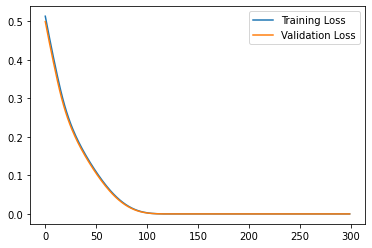

In [8]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [9]:
print(encoded_st)

[[-0.06934047  0.45605153]]


In [10]:
import strawberryfields as sf
from strawberryfields import ops
sf.about()


Strawberry Fields: a Python library for continuous-variable quantum circuits.
Copyright 2018-2020 Xanadu Quantum Technologies Inc.

Python version:            3.9.7
Platform info:             Windows-10-10.0.22000-SP0
Installation path:         C:\Users\Bartu\anaconda3\envs\qml\lib\site-packages\strawberryfields
Strawberry Fields version: 0.23.0
Numpy version:             1.22.2
Scipy version:             1.8.0
SymPy version:             1.9
NetworkX version:          2.6.3
The Walrus version:        0.18.0
Blackbird version:         0.4.0
XCC version:               0.2.1
TensorFlow version:        2.8.0


In [11]:
def layer(params, q):
    """CV quantum neural network layer acting on ``N`` modes.

    Args:
        params (list[float]): list of length ``2*(max(1, N-1) + N**2 + n)`` containing
            the number of parameters for the layer
        q (list[RegRef]): list of Strawberry Fields quantum registers the layer
            is to be applied to
    """
    ops.Dgate(tf.clip_by_value(encoded_st[0][0], clip_value_min = -1.5, clip_value_max = 1.5), encoded_st[0][1]) | q[0]
    
    N = len(q)
    M = int(N * (N - 1)) + max(1, N - 1)

    rphi = params[-N+1:]
    s = params[M:M+N]
    dr = params[2*M+N:2*M+2*N]
    dp = params[2*M+2*N:2*M+3*N]
    k = params[2*M+3*N:2*M+4*N]
    
    ops.Rgate(rphi[0]) | q[0]
    
    for i in range(N):
        ops.Sgate(s[i]) | q[i]

    ops.Rgate(rphi[0]) | q[0]

    for i in range(N):
        ops.Dgate(dr[i], dp[i]) | q[i]
        ops.Kgate(k[i]) | q[i]

In [12]:
# Number of modes
modes = 1

# Cutoff dimension (number of Fock states)
cutoff_dim = 3

# Number of layers (depth)
Qlayers = 25

# Number of steps in optimization routine performing gradient descent
reps = 500

# Learning rate
lr = 0.05

# Standard deviation of initial parameters
passive_sd = 0.2
active_sd = 0.01

# The gamma parameter in the penalty function, given by the reference paper.
norm_weight = 200

In [13]:
def init_weights(modes, layers, active_sd=0.0001, passive_sd=0.1):
    """Initialize a 2D TensorFlow Variable containing normally-distributed
    random weights for an ``N`` mode quantum neural network with ``L`` layers.

    Args:
        modes (int): the number of modes in the quantum neural network
        layers (int): the number of layers in the quantum neural network
        active_sd (float): the standard deviation used when initializing
            the normally-distributed weights for the active parameters
            (displacement, squeezing, and Kerr magnitude)
        passive_sd (float): the standard deviation used when initializing
            the normally-distributed weights for the passive parameters
            (beamsplitter angles and all gate phases)

    Returns:
        tf.Variable[tf.float32]: A TensorFlow Variable of shape
        ``[layers, 2*(max(1, modes-1) + modes**2 + modes)]``, where the Lth
        row represents the layer parameters for the Lth layer.
    """
    # Number of interferometer parameters:
    M = int(modes * (modes - 1)) + max(1, modes - 1)

    # Create the TensorFlow variables
    int1_weights = tf.random.normal(shape=[layers, M], stddev=passive_sd)
    s_weights = tf.random.normal(shape=[layers, modes], stddev=active_sd)
    int2_weights = tf.random.normal(shape=[layers, M], stddev=passive_sd)
    dr_weights = tf.random.normal(shape=[layers, modes], stddev=active_sd)
    dp_weights = tf.random.normal(shape=[layers, modes], stddev=passive_sd)
    k_weights = tf.random.normal(shape=[layers, modes], stddev=active_sd)

    weights = tf.concat(
        [int1_weights, s_weights, int2_weights, dr_weights, dp_weights, k_weights], axis=1
    )

    weights = tf.Variable(weights)

    return weights

In [14]:
# set the random seed
tf.random.set_seed(137)
np.random.seed(137)

In [15]:
# defining desired state (single photon state)
target_state = np.zeros(cutoff_dim)
print(target_state)
target_state[2] = 1
print(target_state)
target_state = x_train[0]
print(target_state)
##Below prevents Wigner state plotter check if it impacts representation
#target_state = tf.constant(target_state, dtype=tf.complex64)

[0. 0. 0.]
[0. 0. 1.]
[0.+0.j 1.+0.j 0.+0.j]


In [16]:
# initialize engine and program
eng = sf.Engine(backend="tf", backend_options={"cutoff_dim": cutoff_dim})
qnn = sf.Program(modes)

# initialize QNN weights
weights = init_weights(modes, Qlayers) # our TensorFlow weights
num_params = np.prod(weights.shape)   # total number of parameters in our model

In [17]:
# Create array of Strawberry Fields symbolic gate arguments, matching
# the size of the weights Variable.
sf_params = np.arange(num_params).reshape(weights.shape).astype(np.str)
sf_params = np.array([qnn.params(*i) for i in sf_params])


# Construct the symbolic Strawberry Fields program by
# looping and applying layers to the program.
with qnn.context as q:
    for k in range(Qlayers):
        layer(sf_params[k], q)

C:\Users\Bartu\AppData\Local\Temp\ipykernel_22648\2132937993.py:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [18]:
def cost(weights):
    # Create a dictionary mapping from the names of the Strawberry Fields
    # free parameters to the TensorFlow weight values.
    mapping = {p.name: w for p, w in zip(sf_params.flatten(), tf.reshape(weights, [-1]))}

    # Run engine
    state = eng.run(qnn, args=mapping).state

    # Extract the statevector
    ket = state.ket()

    # Compute the fidelity between the output statevector
    # and the target state.
    fidelity = tf.abs(tf.reduce_sum(tf.math.conj(ket) * target_state)) ** 2

    # Objective function to minimize
    #cost = tf.abs(tf.reduce_sum(tf.math.conj(ket) * target_state) - 1)
    #return cost, fidelity, ket
    # Instead of the Cost function, maybe it is better to break it down to components
    # at least, when the Fock basis is insufficent, it will be visible
    difference = tf.reduce_sum(tf.abs(ket - target_state))
    fidelity = tf.abs(tf.reduce_sum(tf.math.conj(ket) * target_state)) ** 2
    return difference, fidelity, ket, tf.math.real(state.trace())

In [19]:
opt = tf.keras.optimizers.Adam(learning_rate=lr)

In [20]:
fid_progress = []
loss_progress = []
best_fid = 0

for i in range(reps):
    # reset the engine if it has already been executed
    if eng.run_progs:
        eng.reset()

    with tf.GradientTape() as tape:
        loss, fid, ket, trace = cost(weights)

    # Stores fidelity at each step
    fid_progress.append(fid.numpy())
    
    loss_progress.append(loss)

    if fid > best_fid:
        # store the new best fidelity and best state
        best_fid = fid.numpy()
        learnt_state = ket.numpy()

    # one repetition of the optimization
    gradients = tape.gradient(loss, weights)
    opt.apply_gradients(zip([gradients], [weights]))

    # Prints progress at every rep
    if i % 1 == 0:
        print("Rep: {} Cost: {:.4f} Fidelity: {:.4f} Trace: {:.4f}".format(i, loss, fid, trace))

Rep: 0 Cost: 2.3322 Fidelity: 0.0420 Trace: 0.9061
Rep: 1 Cost: 2.0336 Fidelity: 0.3199 Trace: 0.9085
Rep: 2 Cost: 1.6437 Fidelity: 0.1317 Trace: 0.6197
Rep: 3 Cost: 1.6347 Fidelity: 0.0363 Trace: 0.3225
Rep: 4 Cost: 1.4513 Fidelity: 0.0565 Trace: 0.1648
Rep: 5 Cost: 1.1826 Fidelity: 0.0485 Trace: 0.1051
Rep: 6 Cost: 1.0570 Fidelity: 0.0323 Trace: 0.0544
Rep: 7 Cost: 1.1315 Fidelity: 0.0223 Trace: 0.0326
Rep: 8 Cost: 1.1516 Fidelity: 0.0145 Trace: 0.0238
Rep: 9 Cost: 1.1151 Fidelity: 0.0068 Trace: 0.0161
Rep: 10 Cost: 1.0679 Fidelity: 0.0029 Trace: 0.0099
Rep: 11 Cost: 1.0409 Fidelity: 0.0023 Trace: 0.0061
Rep: 12 Cost: 1.0259 Fidelity: 0.0027 Trace: 0.0041
Rep: 13 Cost: 1.0270 Fidelity: 0.0030 Trace: 0.0034
Rep: 14 Cost: 1.0339 Fidelity: 0.0027 Trace: 0.0033
Rep: 15 Cost: 1.0397 Fidelity: 0.0024 Trace: 0.0034
Rep: 16 Cost: 1.0349 Fidelity: 0.0021 Trace: 0.0033
Rep: 17 Cost: 1.0218 Fidelity: 0.0021 Trace: 0.0032
Rep: 18 Cost: 1.0054 Fidelity: 0.0022 Trace: 0.0032
Rep: 19 Cost: 0.9914 F

Rep: 157 Cost: 0.1838 Fidelity: 0.9098 Trace: 0.9193
Rep: 158 Cost: 0.1289 Fidelity: 0.9260 Trace: 0.9302
Rep: 159 Cost: 0.1663 Fidelity: 0.9300 Trace: 0.9352
Rep: 160 Cost: 0.1646 Fidelity: 0.9210 Trace: 0.9280
Rep: 161 Cost: 0.1001 Fidelity: 0.9253 Trace: 0.9283
Rep: 162 Cost: 0.1143 Fidelity: 0.9248 Trace: 0.9296
Rep: 163 Cost: 0.1815 Fidelity: 0.9200 Trace: 0.9287
Rep: 164 Cost: 0.1425 Fidelity: 0.9288 Trace: 0.9359
Rep: 165 Cost: 0.2308 Fidelity: 0.9170 Trace: 0.9309
Rep: 166 Cost: 0.2188 Fidelity: 0.9152 Trace: 0.9307
Rep: 167 Cost: 0.2072 Fidelity: 0.9185 Trace: 0.9306
Rep: 168 Cost: 0.1505 Fidelity: 0.9295 Trace: 0.9335
Rep: 169 Cost: 0.1816 Fidelity: 0.9120 Trace: 0.9233
Rep: 170 Cost: 0.2472 Fidelity: 0.8827 Trace: 0.9078
Rep: 171 Cost: 0.2317 Fidelity: 0.8933 Trace: 0.9135
Rep: 172 Cost: 0.1188 Fidelity: 0.9290 Trace: 0.9336
Rep: 173 Cost: 0.1518 Fidelity: 0.9295 Trace: 0.9350
Rep: 174 Cost: 0.1966 Fidelity: 0.9208 Trace: 0.9326
Rep: 175 Cost: 0.1807 Fidelity: 0.9205 Trace: 

Rep: 312 Cost: 0.1488 Fidelity: 0.9400 Trace: 0.9445
Rep: 313 Cost: 0.0693 Fidelity: 0.9490 Trace: 0.9500
Rep: 314 Cost: 0.1879 Fidelity: 0.9445 Trace: 0.9515
Rep: 315 Cost: 0.1429 Fidelity: 0.9425 Trace: 0.9484
Rep: 316 Cost: 0.1640 Fidelity: 0.9398 Trace: 0.9417
Rep: 317 Cost: 0.1579 Fidelity: 0.9378 Trace: 0.9409
Rep: 318 Cost: 0.1151 Fidelity: 0.9477 Trace: 0.9496
Rep: 319 Cost: 0.1151 Fidelity: 0.9480 Trace: 0.9498
Rep: 320 Cost: 0.1095 Fidelity: 0.9404 Trace: 0.9414
Rep: 321 Cost: 0.0890 Fidelity: 0.9413 Trace: 0.9421
Rep: 322 Cost: 0.1321 Fidelity: 0.9423 Trace: 0.9446
Rep: 323 Cost: 0.1365 Fidelity: 0.9383 Trace: 0.9399
Rep: 324 Cost: 0.1062 Fidelity: 0.9385 Trace: 0.9407
Rep: 325 Cost: 0.0926 Fidelity: 0.9445 Trace: 0.9453
Rep: 326 Cost: 0.0785 Fidelity: 0.9436 Trace: 0.9446
Rep: 327 Cost: 0.0758 Fidelity: 0.9429 Trace: 0.9442
Rep: 328 Cost: 0.0787 Fidelity: 0.9497 Trace: 0.9506
Rep: 329 Cost: 0.1404 Fidelity: 0.9457 Trace: 0.9508
Rep: 330 Cost: 0.1181 Fidelity: 0.9424 Trace: 

Rep: 467 Cost: 0.1127 Fidelity: 0.9583 Trace: 0.9597
Rep: 468 Cost: 0.0940 Fidelity: 0.9529 Trace: 0.9543
Rep: 469 Cost: 0.1005 Fidelity: 0.9497 Trace: 0.9527
Rep: 470 Cost: 0.1008 Fidelity: 0.9573 Trace: 0.9585
Rep: 471 Cost: 0.0718 Fidelity: 0.9602 Trace: 0.9610
Rep: 472 Cost: 0.1346 Fidelity: 0.9554 Trace: 0.9575
Rep: 473 Cost: 0.1104 Fidelity: 0.9544 Trace: 0.9549
Rep: 474 Cost: 0.1269 Fidelity: 0.9496 Trace: 0.9549
Rep: 475 Cost: 0.1284 Fidelity: 0.9466 Trace: 0.9532
Rep: 476 Cost: 0.1293 Fidelity: 0.9508 Trace: 0.9533
Rep: 477 Cost: 0.1444 Fidelity: 0.9479 Trace: 0.9530
Rep: 478 Cost: 0.1476 Fidelity: 0.9539 Trace: 0.9566
Rep: 479 Cost: 0.1549 Fidelity: 0.9541 Trace: 0.9563
Rep: 480 Cost: 0.1105 Fidelity: 0.9504 Trace: 0.9539
Rep: 481 Cost: 0.1703 Fidelity: 0.9509 Trace: 0.9536
Rep: 482 Cost: 0.1737 Fidelity: 0.9518 Trace: 0.9536
Rep: 483 Cost: 0.1349 Fidelity: 0.9523 Trace: 0.9553
Rep: 484 Cost: 0.1646 Fidelity: 0.9521 Trace: 0.9573
Rep: 485 Cost: 0.1453 Fidelity: 0.9551 Trace: 

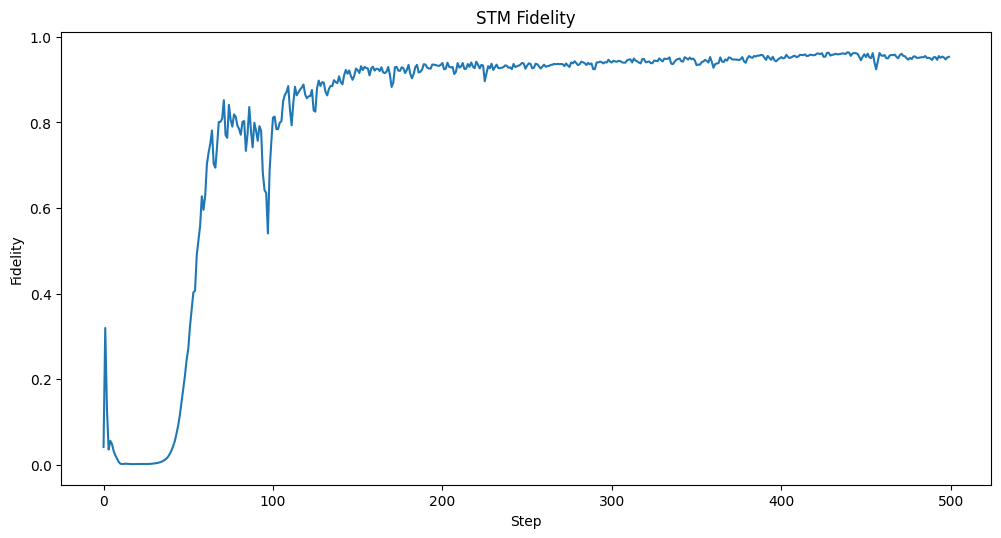

In [21]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=100)

plt.plot(fid_progress)
plt.ylabel("Fidelity")
plt.xlabel("Step")
plt.title('STM Fidelity')

plt.savefig('STM_fidelity.png')

tf.Tensor(0.11992564, shape=(), dtype=float32)


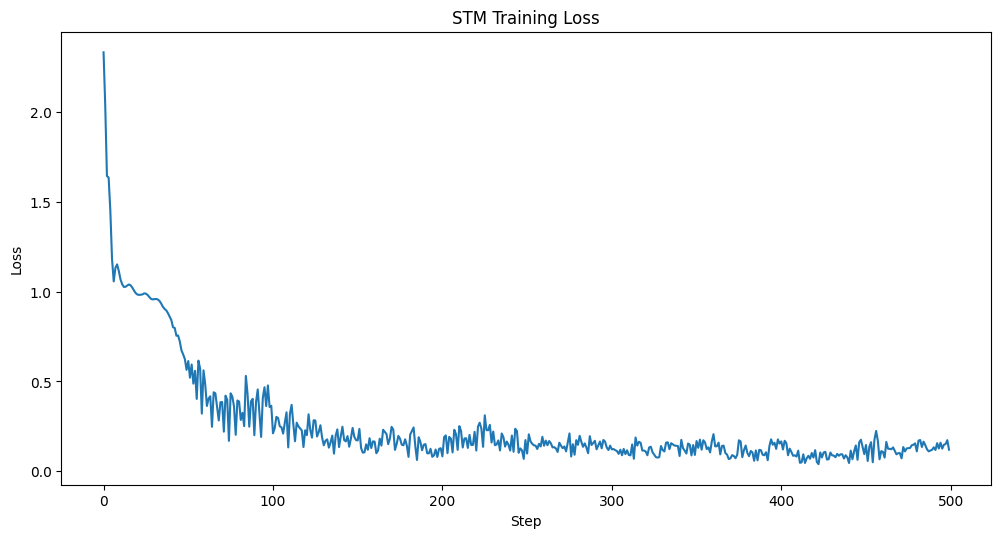

In [27]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=100)
print(loss)
plt.plot(loss_progress)
plt.ylabel("Loss")
plt.xlabel("Step")
plt.title('STM Training Loss')

plt.savefig('STM_loss.png')

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def wigner(rho):
    """This code is a modified version of the 'iterative' method
    of the wigner function provided in QuTiP, which is released
    under the BSD license, with the following copyright notice:

    Copyright (C) 2011 and later, P.D. Nation, J.R. Johansson,
    A.J.G. Pitchford, C. Granade, and A.L. Grimsmo.

    All rights reserved."""
    import copy

    # Domain parameter for Wigner function plots
    l = 5.0
    cutoff = rho.shape[0]

    # Creates 2D grid for Wigner function plots
    x = np.linspace(-l, l, 100)
    p = np.linspace(-l, l, 100)

    Q, P = np.meshgrid(x, p)
    A = (Q + P * 1.0j) / (2 * np.sqrt(2 / 2))

    Wlist = np.array([np.zeros(np.shape(A), dtype=complex) for k in range(cutoff)])

    # Wigner function for |0><0|
    Wlist[0] = np.exp(-2.0 * np.abs(A) ** 2) / np.pi

    # W = rho(0,0)W(|0><0|)
    W = np.real(rho[0, 0]) * np.real(Wlist[0])

    for n in range(1, cutoff):
        Wlist[n] = (2.0 * A * Wlist[n - 1]) / np.sqrt(n)
        W += 2 * np.real(rho[0, n] * Wlist[n])

    for m in range(1, cutoff):
        temp = copy.copy(Wlist[m])
        # Wlist[m] = Wigner function for |m><m|
        Wlist[m] = (2 * np.conj(A) * temp - np.sqrt(m) * Wlist[m - 1]) / np.sqrt(m)

        # W += rho(m,m)W(|m><m|)
        W += np.real(rho[m, m] * Wlist[m])

        for n in range(m + 1, cutoff):
            temp2 = (2 * A * Wlist[n - 1] - np.sqrt(m) * temp) / np.sqrt(n)
            temp = copy.copy(Wlist[n])
            # Wlist[n] = Wigner function for |m><n|
            Wlist[n] = temp2

            # W += rho(m,n)W(|m><n|) + rho(n,m)W(|n><m|)
            W += 2 * np.real(rho[m, n] * Wlist[n])

    return Q, P, W / 2

In [29]:
rho_target = np.outer(target_state, target_state.conj())
rho_learnt = np.outer(learnt_state, learnt_state.conj())

C:\Users\Bartu\AppData\Local\Temp\ipykernel_22648\1595207717.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


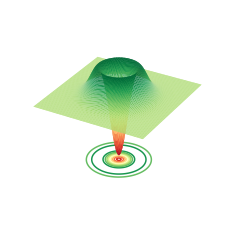

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
X, P, W = wigner(rho_target)
ax.plot_surface(X, P, W, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
ax.contour(X, P, W, 10, cmap="RdYlGn", linestyles="solid", offset=-0.17)
ax.set_axis_off()
fig.show()

C:\Users\Bartu\AppData\Local\Temp\ipykernel_22648\4117463628.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


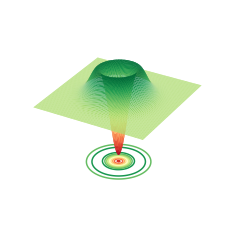

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
X, P, W = wigner(rho_learnt)
ax.plot_surface(X, P, W, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
ax.contour(X, P, W, 10, cmap="RdYlGn", linestyles="solid", offset=-0.17)
ax.set_axis_off()
fig.show()